# 4.4 使用逻辑回归算法实现

## 1.业务理解

In [1]:
# 略，见教材内容。本文件为教材《数据分析理论与实践：基于经典算法及Python编程实现》（朝乐门主编，机械工业出版社，2022年）的配套代码。

## 2.数据读入

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [3]:
#数据导入 内置数据集（威斯康星州乳腺癌数据集）
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [4]:
help(load_breast_cancer)

Help on function load_breast_cancer in module sklearn.datasets._base:

load_breast_cancer(*, return_X_y=False, as_frame=False)
    Load and return the breast cancer wisconsin dataset (classification).
    
    The breast cancer dataset is a classic and very easy binary classification
    dataset.
    
    =================   ==============
    Classes                          2
    Samples per class    212(M),357(B)
    Samples total                  569
    Dimensionality                  30
    Features            real, positive
    =================   ==============
    
    The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
    downloaded from:
    https://goo.gl/U2Uwz2
    
    Read more in the :ref:`User Guide <breast_cancer_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
       

In [5]:
#显示数据集字典的键
print(breast_cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
#数据集的完整描述
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
#数据集的特征名称
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
#数据形状
print(breast_cancer.data.shape)

(569, 30)


In [9]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
#将数据（data）与回归目标（target）转化为数据框类型
X= pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y= pd.DataFrame(breast_cancer.target, columns=['diagnosis'])

In [11]:
from sklearn.preprocessing import StandardScaler
means_normalization = StandardScaler()   
means_normalization.fit(X)  
X = means_normalization.transform(X)
X[2]

array([ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044,
        1.05292554,  1.36347845,  2.03723076,  0.93968482, -0.39800791,
        1.22867595, -0.78008338,  0.8509283 ,  1.18133606, -0.29700501,
        0.8149735 ,  0.21307643,  1.42482747,  0.23703554,  0.2935594 ,
        1.51187025, -0.02397438,  1.34747521,  1.45628455,  0.52740741,
        1.08293217,  0.85497394,  1.95500035,  1.152255  ,  0.20139121])

In [12]:
y

,diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [13]:
#合并数据框
df= pd.concat([pd.DataFrame(X), y], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0


## 3.数据理解

In [14]:
#查看数据基本信息
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          569 non-null    float64
 1   1          569 non-null    float64
 2   2          569 non-null    float64
 3   3          569 non-null    float64
 4   4          569 non-null    float64
 5   5          569 non-null    float64
 6   6          569 non-null    float64
 7   7          569 non-null    float64
 8   8          569 non-null    float64
 9   9          569 non-null    float64
 10  10         569 non-null    float64
 11  11         569 non-null    float64
 12  12         569 non-null    float64
 13  13         569 non-null    float64
 14  14         569 non-null    float64
 15  15         569 non-null    float64
 16  16         569 non-null    float64
 17  17         569 non-null    float64
 18  18         569 non-null    float64
 19  19         569 non-null    float64
 20  20        

In [15]:
#查看描述性统计信息
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,diagnosis
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15,0.627417
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,1.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.000000


## 4.数据准备

In [16]:
#划分训练集与测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , test_size=0.3
                                                    ,random_state=42) 
X_test

array([[-0.47069438, -0.16048584, -0.44810956, ..., -0.19956318,
         0.18320441,  0.19695794],
       [ 1.36687747,  0.47014935,  1.30288585, ...,  0.97897545,
        -0.56582801, -1.00057787],
       [ 0.37850807,  0.04429607,  0.40082046, ...,  0.56024403,
        -0.10314275, -0.20813168],
       ...,
       [-1.19947481, -0.28614746, -1.12733597, ..., -0.23610702,
        -0.46390783,  1.78739191],
       [-0.08727522,  1.2101567 ,  0.01486829, ...,  0.57090264,
         1.21373066,  1.90376512],
       [-0.35140842, -1.20533898, -0.28911539, ...,  0.63180903,
        -0.42346332,  1.87605721]])

## 5.模型训练

In [17]:
#模型训练
model=LogisticRegression()
model.fit(X_train,np.ravel(y_train))

LogisticRegression()

In [18]:
#默认参数模型预测结果y_pred
y_pred=model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

## 6.模型评价

In [19]:
#混淆矩阵（分类算法的重要评估指标）
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[ 62,   1],
       [  2, 106]], dtype=int64)

In [20]:
#分类指标——准确度（Accuracy）、精度（Precision）
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.9824561403508771
Precision: 0.9906542056074766


## 7. 模型调参

In [21]:

param_grid={"C":[0.001,0.1,1,10]}
n_folds=5

In [22]:
# GridSearchCV?

In [23]:

estimator=GridSearchCV(LogisticRegression()
                       ,param_grid
                       ,cv=n_folds)
estimator.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1, 10]})

In [24]:
#通过best_estimator_属性，得出通过搜索选择的最高分（或最小损失）的估计量。
estimator.best_estimator_

LogisticRegression(C=1)

In [25]:
estimator

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1, 10]})

## 8.模型预测

In [26]:
#调参后的模型训练
model_updated=LogisticRegression(C=1)
model_updated.fit(X_train,np.ravel(y_train))
model_updated.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [28]:
#调参后的模型预测结果y_pred_updated
y_pred_updated=model_updated.predict(X_test)
y_pred_updated

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [29]:
#调参后的模型混淆矩阵结果
matrix_updated = metrics.confusion_matrix(y_test, y_pred_updated)
matrix_updated

array([[ 62,   1],
       [  2, 106]], dtype=int64)

In [30]:
#调参后的模型准确度、精度分类指标评价结果
print("Accuracy1:",metrics.accuracy_score(y_test, y_pred_updated))
print("Precision1:",metrics.precision_score(y_test, y_pred_updated))

Accuracy1: 0.9824561403508771
Precision1: 0.9906542056074766


# 关于Roc曲线的讨论

In [31]:
model_updated

LogisticRegression(C=1)

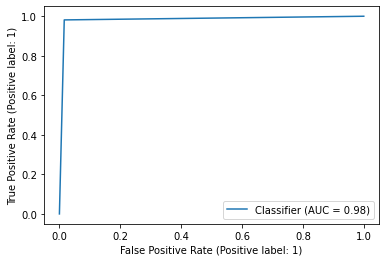

In [32]:
from sklearn import  metrics

metrics.RocCurveDisplay.from_predictions(y_test, y_pred_updated)

# 关于学习曲线的讨论

In [33]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model_updated
                                                        , X, y, cv=10
                                                        , scoring='accuracy'
                                                        , n_jobs=-1
                                                        , train_sizes=np.linspace(0.01, 1.0, 50))

In [37]:
np.linspace(0.01, 1.0, 50)

array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ])

In [34]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

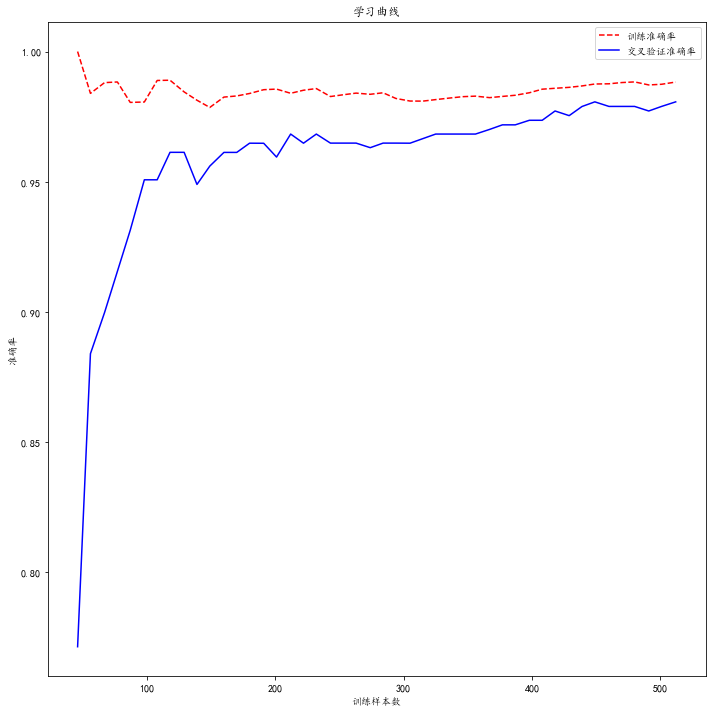

In [36]:
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.rcParams["font.family"]="KaiTi"
plt.plot(train_sizes, train_mean, '--', color="red",  label="训练准确率")
plt.plot(train_sizes, test_mean, color="blue", label="交叉验证准确率")

plt.title("学习曲线")
plt.xlabel("训练样本数"), plt.ylabel("准确率"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


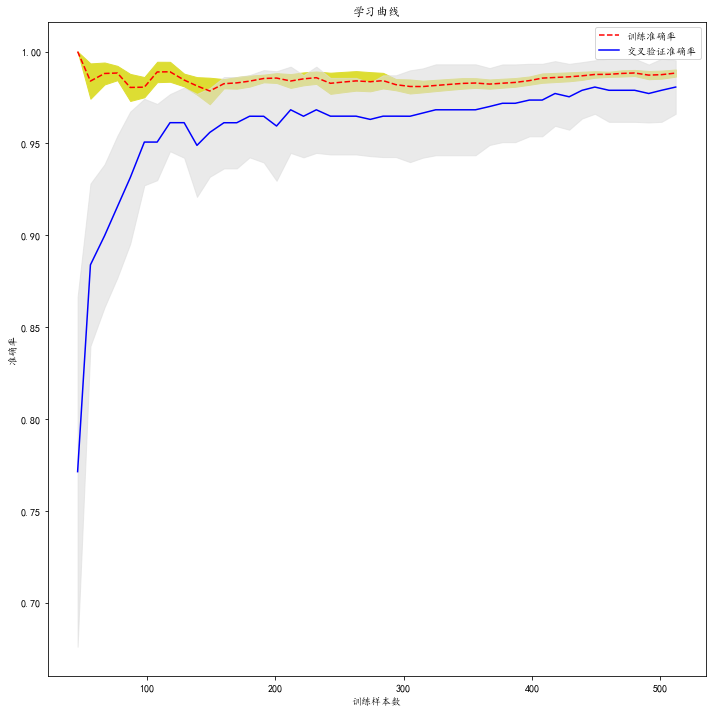

In [38]:
#进一步修饰
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.rcParams["font.family"]="KaiTi"
plt.plot(train_sizes, train_mean, '--', color="red",  label="训练准确率")
plt.plot(train_sizes, test_mean, color="blue", label="交叉验证准确率")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDD33")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD",alpha=0.6)

plt.title("学习曲线")
plt.xlabel("训练样本数"), plt.ylabel("准确率"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 关于Solver的讨论

In [39]:
params = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}

model_lr = LogisticRegression(C=1,  random_state=13,max_iter=100)
clf = GridSearchCV(model_lr, params, cv=5)
clf.fit(X_train, np.ravel(y_train))

C:\Users\chaol\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chaol\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chaol\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chaol\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chaol\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\chaol\AppDa

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, random_state=13),
             param_grid={'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [40]:
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, params['solver']):
    print(f"  {solver} {score:.6f}" )

  liblinear 0.974810
  newton-cg 0.974810
  lbfgs 0.974810
  sag 0.972310
  saga 0.972310


In [41]:
#上一行代码的params[solver]的分析
clf.cv_results_

{'mean_fit_time': array([0.0041934 , 0.00608773, 0.0028336 , 0.01415715, 0.01252079]),
 'std_fit_time': array([0.00203554, 0.0008499 , 0.00347049, 0.00522726, 0.00423755]),
 'mean_score_time': array([0.00060158, 0.00020175, 0.        , 0.        , 0.00019994]),
 'std_score_time': array([0.00080094, 0.0004035 , 0.        , 0.        , 0.00039988]),
 'param_solver': masked_array(data=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'solver': 'liblinear'},
  {'solver': 'newton-cg'},
  {'solver': 'lbfgs'},
  {'solver': 'sag'},
  {'solver': 'saga'}],
 'split0_test_score': array([0.975, 0.975, 0.975, 0.975, 0.975]),
 'split1_test_score': array([0.975 , 0.975 , 0.975 , 0.9625, 0.9625]),
 'split2_test_score': array([1., 1., 1., 1., 1.]),
 'split3_test_score': array([0.96202532, 0.96202532, 0.96202532, 0.96202532, 0.96202532]),
 'split4_test_score': array([0.96202532, 0.96

In [42]:
#调参后的模型训练
model_tuned=LogisticRegression(C=1 
                               , solver="liblinear" 
                               , penalty="l2")
model_tuned.fit(X_train,np.ravel(y_train))
model_tuned.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
y_pred_tuned=model_tuned.predict(X_test)
print("Accuracy1:",metrics.accuracy_score(y_test, y_pred_tuned))
print("Precision1:",metrics.precision_score(y_test, y_pred_tuned))

Accuracy1: 0.9824561403508771
Precision1: 0.9906542056074766
